In [ ]:
from numbers import Number
import numpy as np
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import sklearn
import tensorflow as tf
import os
import zipfile
from google.colab import files
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import pandas as pd
import json
import random
from PIL import Image
from collections import Counter
from google.colab import drive

# Mount Google Drive
#drive.mount('/content/drive')

## **Limpieza de los Datos**
---


In [ ]:
pd.DataFrame(Y_train).value_counts().values > 10

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True])

### **Imágenes conjunto Validación**

In [ ]:
pd.DataFrame(Y_valid).value_counts()[pd.DataFrame(Y_valid).value_counts().values > 10].index.tolist()
#[51,88,77,76,73,46,81,17,41,89,74,94,58,43,60,95,82,83,80,23,75,78,18,50]

[(51,),
 (88,),
 (77,),
 (76,),
 (73,),
 (46,),
 (81,),
 (17,),
 (41,),
 (89,),
 (74,),
 (94,),
 (58,),
 (43,),
 (60,),
 (95,),
 (82,),
 (83,),
 (80,),
 (23,),
 (75,),
 (78,),
 (18,),
 (50,)]

### **Imágenes Conjunto Test**

In [ ]:
pd.DataFrame(Y_test).value_counts()[pd.DataFrame(Y_test).value_counts().values > 10].index.tolist()
#[73,77,51,46,82,43,94,89,58,30,90,74,83,41,95,78,53,81,75,88,80,57,92,72,44]

[(73,),
 (77,),
 (51,),
 (46,),
 (82,),
 (43,),
 (94,),
 (89,),
 (58,),
 (30,),
 (90,),
 (74,),
 (83,),
 (41,),
 (95,),
 (78,),
 (53,),
 (81,),
 (75,),
 (88,),
 (80,),
 (57,),
 (92,),
 (72,),
 (44,)]

Como podemos ver, tenemos categorías con imágenes de validación y testeo por debajo de las 10 unidades, por lo tanto se puede llegar a generar un sesgo en el proceso de calificación de validación y testeo, por lo tanto, cogeremos aquellas categorías que cuente con más de 10 imágenes en sus respectivas muestras de validación y testeo.

In [ ]:
a = [51,88,77,76,73,46,81,17,41,89,74,94,58,43,60,95,82,83,80,23,75,78,18,50]
b = [73,77,51,46,82,43,94,89,58,30,90,74,83,41,95,78,53,81,75,88,80,57,92,72,44]
c = np.intersect1d(a, b).tolist()

In [ ]:
all_images = []
labels = []
for i in c:
    cat_path = f"dataset/102 flower/flowers/train/{i}/"
    for im_path in os.listdir(cat_path):
        all_images.append(np.array(tf.keras.preprocessing.image.load_img(cat_path+im_path,target_size=(224, 224, 3))))
        labels.append(i)
X_train = np.array(all_images)
Y_train = np.array(labels)

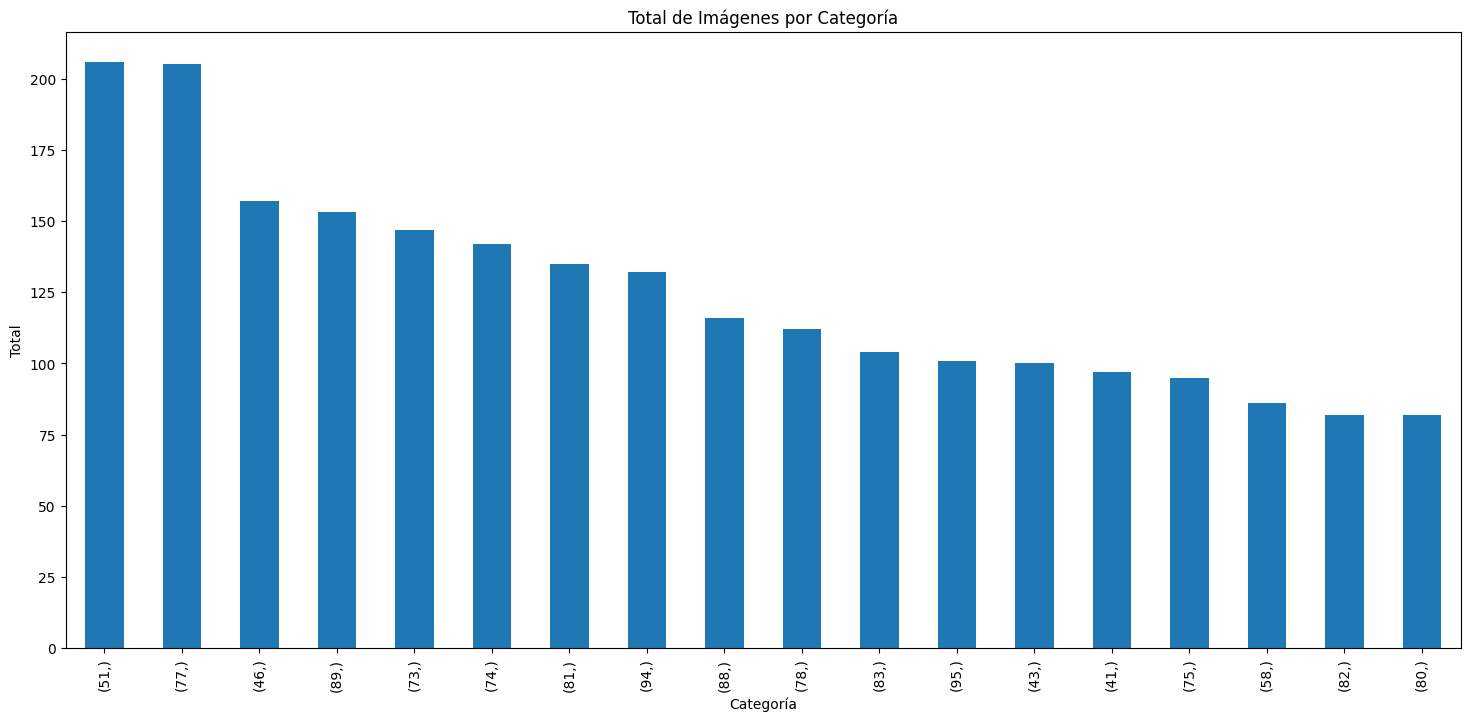

In [ ]:
plt.figure(figsize=(18, 8))

cat_train = pd.DataFrame(Y_train).value_counts().plot(kind='bar')

plt.xlabel('Categoría')
plt.ylabel('Total')
plt.title('Total de Imágenes por Categoría')

plt.show()

In [ ]:
print(X_train.shape)
print(Y_train.shape)

(2252, 224, 224, 3)
(2252,)


In [ ]:
all_images = []
labels = []
for i in c:
    cat_path = f"dataset/102 flower/flowers/valid/{i}/"
    for im_path in os.listdir(cat_path):
        all_images.append(np.array(tf.keras.preprocessing.image.load_img(cat_path+im_path,target_size=(224, 224, 3))))
        labels.append(i)

X_valid = np.array(all_images)
Y_valid = np.array(labels)

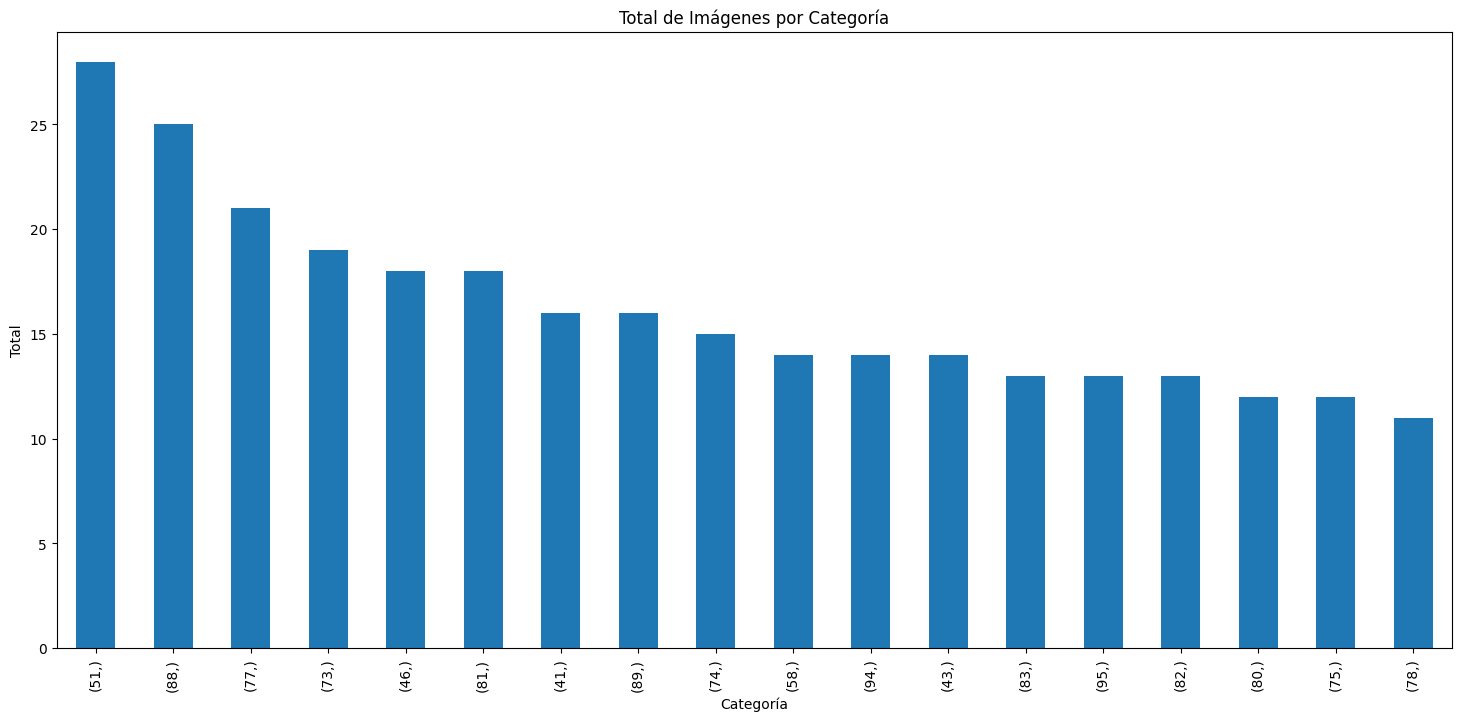

In [ ]:
plt.figure(figsize=(18, 8))
cat_valid  = pd.DataFrame(Y_valid).value_counts().plot(kind='bar')

plt.xlabel('Categoría')
plt.ylabel('Total')
plt.title('Total de Imágenes por Categoría')

plt.show()

In [ ]:
all_images = []
labels = []
for i in c:
    cat_path = f"dataset/102 flower/flowers/test/{i}/"
    for im_path in os.listdir(cat_path):
        all_images.append(np.array(tf.keras.preprocessing.image.load_img(cat_path+im_path,
                                                                         target_size=(224, 224, 3))))
        labels.append(i)

X_test = np.array(all_images)
Y_test = np.array(labels)

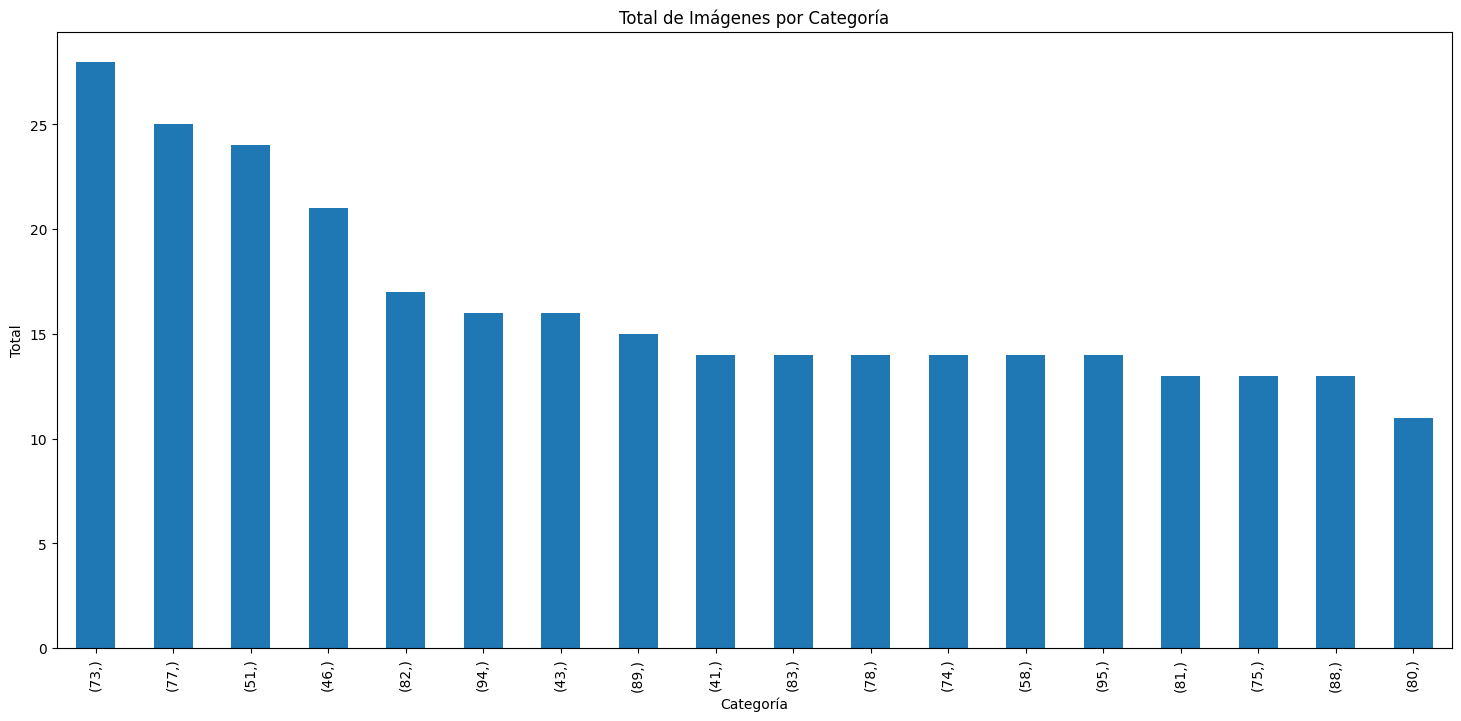

In [ ]:
plt.figure(figsize=(18, 8))

cat_test = pd.DataFrame(Y_test).value_counts().plot(kind='bar')

plt.xlabel('Categoría')
plt.ylabel('Total')
plt.title('Total de Imágenes por Categoría')

plt.show()

es necesario reordenar los identificadores del modelo, para poder definir la respuesta para el modelo, por lo tanto, la conexión con el archivo json adjunto para saber el nombre de la flor necesitará un paso previo de configuación del entero ordenado

In [ ]:
ordered_to_id = {i: j for i, j in enumerate(c)}
id_to_ordered = {j: i for i, j in ordered_to_id.items()}
def convert_id(value, via):
  if via == 'to_id':
    return ordered_to_id[value]
  if via == 'to_ordered':
    return id_to_ordered[value]

In [ ]:
Y_train_correct = np.array([convert_id(i, 'to_ordered') for i in Y_train])
Y_valid_correct = np.array([convert_id(i, 'to_ordered') for i in Y_valid])
Y_test_correct = np.array([convert_id(i, 'to_ordered') for i in Y_test])

# **Diseño e implementación experimental**
---

## **Data Augmentation**
---

Se inicia con una tarea de Data Augmentation para extender nuestro conjunto de entrenamiento, esto lo vemos necesario ya que algunas de las categorías están poco representadas y esto puede ayudarnos a compensar esta falta de representación. A continuación definimos los generadores para el conjunto de entrenamiento y el de validación, este último únicamente con escalado de las imágenes.

In [ ]:
Y_train_1 = tf.keras.utils.to_categorical(Y_train_correct)
Y_val_1 = tf.keras.utils.to_categorical(Y_valid_correct)
Y_test_1 = tf.keras.utils.to_categorical(Y_test_correct)

train_datagen_1 = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255,
    rotation_range=90,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='constant'
)
train_gen_1 = train_datagen_1.flow(x=X_train,
                               y=Y_train_1,
                               batch_size=32)

valid_datagen_1 = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255
)
valid_gen_1 = valid_datagen_1.flow(x=X_valid,
                               y=Y_val_1,
                               batch_size=32)

Veamos algunos ejemplos de las transformaciones aplicadas:

Cada batch del generador tiene tamaño  (32, 224, 224, 3)


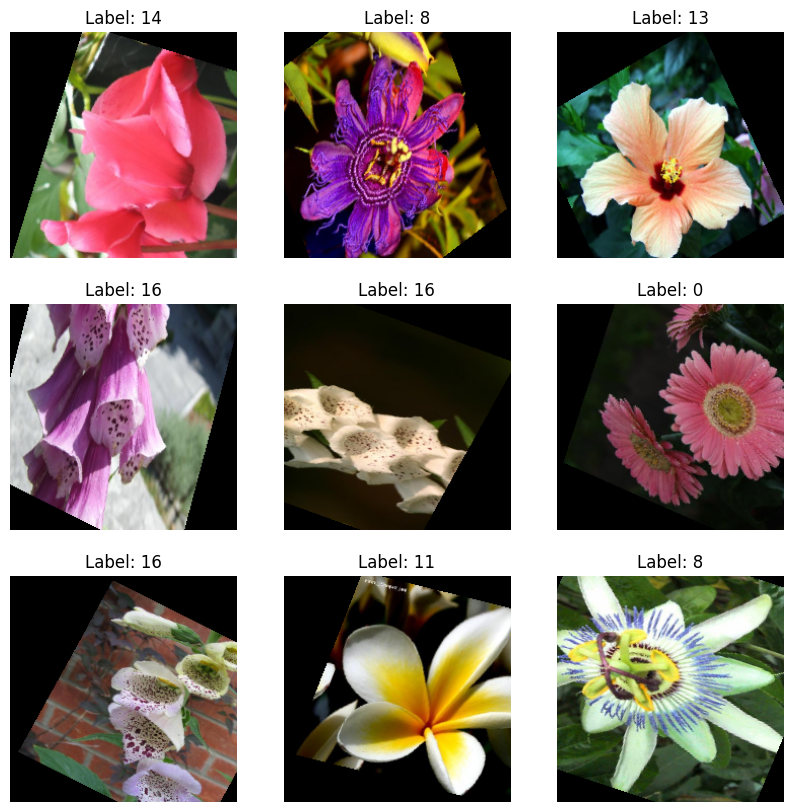

In [ ]:
#print("La función retorna un objeto tipo", type(train_gen))

print("Cada batch del generador tiene tamaño ", next(train_gen_1)[0].shape)
# Extraemos un batch
ims, lab = next(train_gen_1)

labels = np.argmax(lab, axis=1)

plt.figure(figsize=(10, 10))
# Mostramos 9 ejemplos
for i in range(9):
    plt.subplot(331+i)
    plt.imshow(ims[i]); plt.axis("off"); plt.title(f"Label: {labels[i]}")